<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1605139200&v=beta&t=opmJLG_veDflQesF9uJvIhSXbmwPY3DGSlbZo1v-w2k" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 1. Métodos de particionamiento: caso práctico segmentación de Expresión de Proteínas en h2o

### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

In [5]:
from IPython.display import Image
%matplotlib inline


## Instalación de H2O

In [1]:
#pip install requests
#pip install tabulate
#pip install "colorama>=0.3.8"
#pip install future 

In [ ]:
#!pip install -U h2o

In [ ]:
#pip install http://h2o-release.s3.amazonaws.com/h2o/rel-yu/4/Python/h2o-3.28.0.4-py2.py3-none-any.whl

In [6]:
Image(filename='D:/Python/webinar/01_07.png', width=600) 

In [7]:
Image(filename='D:/Python/webinar/01_10.png', width=600) 

In [2]:
import h2o

In [3]:
h2o.init (nthreads = -1, #nthreads = -1: se utilizaran todos los nodos de procesamiento
          max_mem_size = "4g") #4g: se asigna el 25% de memoria ram

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpce8wvf44
  JVM stdout: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpce8wvf44\h2o_SOCIAL_DATA_started_from_python.out
  JVM stderr: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpce8wvf44\h2o_SOCIAL_DATA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,5 months and 2 days !!!
H2O_cluster_name:,H2O_from_python_SOCIAL_DATA_8789ng
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


Cuando se inicializa h2o, se generará un mensaje que hace referencia a la conexión exitosa de la librería al cluster que realizará los cálculos. El parámetro nthreads = -1 se refiere a que se harán uso de todos los CPU disponibles del equipo para realizarlos.

La versión de H2O en el repositorio podría estar hasta un mes o dos detrás de la última y mejor. A menos que se vea afectado por un error que sabe que se ha solucionado, no se preocupe. $h2o.init ()$ solo usará dos núcleos en su máquina y quizás una cuarta parte de la memoria de su sistema, 6 por defecto. Use $h2o.shutdown()$ para ver lo que hace. Luego, para comenzar de nuevo, pero usando todos los núcleos: $h2o.init (nthreads = -1)$. Y para darle, digamos, 4GB y todos sus núcleos: $h2o.init (nthreads = -1, max_mem_size = "4g")$.

#### Consideraciones:

1. Algunos sistemas requieren contar con Java para 64 bits. En la carpeta correspondiente a la sesión podemos encontrar el ejecutable: jdk-8u231-windows-x64.exe
2. Debemos tener una versión actualizada del clúster H2O. Nosotros trabajaremos con la versión 3.26.0.2 que se instalará desde el terminal de Windows con la siguiente sentencia: h2o.jar 

## K-means en h2o

In [22]:
from h2o.estimators.kmeans import H2OKMeansEstimator

Información del conjunto de datos:

El conjunto de datos consiste en los niveles de expresión de 77 proteínas / modificaciones de proteínas que produjeron señales detectables en la fracción nuclear de la corteza. Hay 38 ratones de control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. 

En los experimentos, se registraron 15 mediciones de cada proteína por muestra / ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 mediciones, y para los ratones trisómicos, hay 34x15, o 510 mediciones.

El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medida puede considerarse como una muestra / ratón independiente.
Las ocho clases de ratones se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser de control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (shock de contexto) y otros no (contexto de shock) y para evaluar el efecto del medicamento memantina en la recuperación de la capacidad de aprender en ratones trisómicos, algunos ratones han sido inyectado con la droga y otros no.
Clases: 
c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones) 
c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones) 
c-SC-s: ratones de control , no estimulado para aprender, inyectado con solución salina (9 ratones) 
c-SC-m: ratones de control, no estimulado para aprender, inyectado con memantina (10 ratones)
t-CS-s: ratones con trisomía, estimulados para aprender, inyectados con solución salina (7 ratones) 
t-CS-m: ratones con trisomía, estimulados para aprender, inyectados con memantina (9 ratones) 
t-SC-s: ratones con trisomía, no estimulados para aprender, inyectados con solución salina (9 ratones) 
t-SC-m: ratones con trisomía, no estimulados para aprender, inyectados con memantina (9 ratones)

**Objetivo:** identificar subconjuntos de proteínas que son discriminantes entre las clases.

**Fuente:** Clara Higuera, Departamento de Ingeniería de Software e Inteligencia Artificial, Facultad de Informática y Departamento de Bioquímica y Biología Molecular, Facultad de Química, Universidad Complutense, Madrid, España. Correo electrónico:
clarahiguera '@' ucm.es
Katheleen J. Gardiner, creadora y propietaria de los datos de expresión de proteínas, se encuentra actualmente en el Instituto Linda Crnic para el Síndrome de Down, Departamento de Pediatría, Departamento de Bioquímica y Genética Molecular, Genética y Genómica Médica Humana, y Programas de Neurociencia, Universidad de Colorado, Facultad de Medicina, Aurora, Colorado, EE. UU.
katheleen.gardiner '@' ucdenver.edu
Krzysztof J. Cios está actualmente en el Departamento de Ciencias de la Computación, Virginia Commonwealth University, Richmond, Virginia, EE. UU., Y la Academia de Ciencias Polaca IITiS, Polonia. Email:
kcios '@' vcu.edu

In [4]:

import pandas as pd
df = pd.read_excel('https://query.data.world/s/jnzl2btcn27pz6sxzwde356nvzuwzf')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [5]:
df=df.drop(['MouseID'], axis=1) #eliminamos la variable identificador (MouseID) de ratón

In [6]:
df=df.dropna() #eliminar las filas con valores faltantes

In [7]:
df.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

In [8]:
df_medicine = h2o.H2OFrame(df)
df_medicine

Parse progress: |█████████████████████████████████████████████████████████| 100%


DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0.649781,0.828696,0.405862,2.92143,5.16798,0.207174,0.17664,3.72808,0.239283,1.66658,0.969466,0.32126,0.406562,0.255293,1.05634,1.0993,1.92528,2.23167,0.426859,0.873228,0.512773,0.34322,0.167629,1.85276,3.36649,1.50367,0.246019,0.305424,0.851006,0.165179,0.441557,2.57822,0.340857,0.487664,0.40105,0.781365,0.534033,0.431846,0.618023,0.361417,0.32196,0.427297,0.252056,0.242086,1.06118,0.163758,1.86237,0.321175,0.541041,2.15955,0.134639,0.158178,0.196124,0.132001,0.16112,0.210988,0.210379,0.128145,0.292461,0.152597,0.527242,0.348062,1.68755,2.43659,0.168172,1.13915,0.987774,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.62718,Control,Memantine,C/S,c-CS-m
0.616481,0.841974,0.388584,2.86258,5.19416,0.223433,0.167725,3.64824,0.22103,1.56515,0.991845,0.342918,0.39691,0.270815,1.03279,1.07871,1.89305,2.33099,0.409185,0.789013,0.511502,0.344807,0.166695,1.85253,3.43116,1.47167,0.24206,0.300172,0.833648,0.162661,0.437253,2.53803,0.337682,0.472618,0.402318,0.786524,0.533219,0.429871,0.603176,0.360258,0.296052,0.425837,0.252017,0.24212,1.06399,0.169981,1.6922,0.320473,0.539226,2.1671,0.136273,0.161579,0.193348,0.139008,0.161529,0.210798,0.193398,0.134583,0.291489,0.151884,0.519787,0.365119,1.66287,2.35473,0.174704,1.22785,0.981655,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.5621,Control,Memantine,C/S,c-CS-m
0.637424,0.852882,0.400561,2.96816,5.35082,0.20879,0.173261,3.81455,0.2223,1.74173,0.989999,0.328976,0.39793,0.263795,1.09229,1.09404,1.91596,1.95254,0.454075,0.793754,0.533205,0.352048,0.172559,1.96579,3.43425,1.5418,0.251952,0.345908,0.881393,0.165278,0.44346,2.60961,0.342398,0.493903,0.410913,0.812791,0.564699,0.441179,0.640232,0.374331,0.299675,0.445214,0.252303,0.241042,1.05945,0.17523,1.65484,0.317856,0.561875,2.18245,0.135914,0.167508,0.192238,0.134804,0.181034,0.202534,0.2043,0.129555,0.270062,0.153629,0.506309,0.349753,1.71636,2.43732,0.156001,1.2261,0.994146,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.57187,Control,Memantine,C/S,c-CS-m
0.576815,0.75539,0.348346,2.6249,4.72751,0.205892,0.161192,3.77853,0.194153,1.50547,0.819167,0.311548,0.385822,0.241562,0.948414,0.924822,1.75584,2.29721,0.484818,0.742183,0.459194,0.33751,0.161982,1.36471,2.81499,1.44079,0.234902,0.274975,0.766452,0.150581,0.407608,2.312,0.312112,0.466305,0.39474,0.740603,0.522971,0.391918,0.585055,0.345186,0.286714,0.399932,0.277458,0.208718,0.969007,0.153779,2.02794,0.299825,0.466762,1.79515,0.126091,0.144363,0.176977,0.118982,0.163632,0.195311,0.194126,0.119356,0.276939,0.134635,0.526503,0.3166,1.58637,2.38214,0.145049,1.0565,0.970067,0.233225,0.133637,0.107321,0.118982,0.12129,0.47911,0.102831,0.144238,0.141681,1.64661,Control,Memantine,C/S,c-CS-m
0.542545,0.757917,0.350051,2.63451,4.7356,0.210526,0.165671,3.87197,0.194297,1.53161,0.815057,0.315001,0.391525,0.254142,0.95537,0.938465,1.74484,2.47785,0.476502,0.71588,0.486307,0.338668,0.1606,1.39817,2.89102,1.4694,0.23487,0.270033,0.755438,0.149555,0.41136,2.32086,0.309478,0.472332,0.393666,0.739209,0.542207,0.389947,0.5874,0.346557,0.290319,0.405838,0.354671,0.212714,0.972906,0.163062,1.9698,0.303008,0.491797,1.76348,0.124348,0.153741,0.188106,0.128635,0.167972,0.196992,0.197117,0.128635,0.283371,0.137211,0.542568,0.340355,1.61919,2.38622,0.150945,1.13274,0.980798,0.244469,0.133358,0.1

In [10]:
#Convertir H2Odataframe a un Dataframe de Pandas 
df_python=h2o.h2o.as_list(df_medicine, #df h20
                          use_pandas=True) #
type(df_python)

pandas.core.frame.DataFrame

In [11]:
df_python.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine,C/S,c-CS-m
1,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,Memantine,C/S,c-CS-m
2,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,Memantine,C/S,c-CS-m
3,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,Memantine,C/S,c-CS-m
4,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,Control,Memantine,C/S,c-CS-m


In [12]:
df_python.tail()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
547,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,1.495507,...,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423,Ts65Dn,Saline,S/C,t-SC-s
548,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,1.594492,...,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757,Ts65Dn,Saline,S/C,t-SC-s
549,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,1.625219,...,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494,Ts65Dn,Saline,S/C,t-SC-s
550,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,1.674043,...,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585,Ts65Dn,Saline,S/C,t-SC-s
551,0.365907,0.552861,0.386275,2.473812,4.347236,0.353783,0.232784,6.085354,0.242726,1.677740,...,0.130069,0.487991,0.194635,0.220056,0.242514,1.085621,Ts65Dn,Saline,S/C,t-SC-s


In [13]:
from collections import defaultdict
from sklearn import preprocessing 

In [14]:
#Defino el diccionario con la funcion LabelEncoder(que se usa para convertir los object en numerico
d = defaultdict(preprocessing.LabelEncoder)
type(d)

collections.defaultdict

In [15]:
df_python.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 81, dtype: object

In [16]:
# Agrupando columnas por tipo de datos
tipos = df_python.columns.to_series().groupby(df_python.dtypes).groups
tipos

{dtype('float64'): Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
        'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
        'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
        'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
        'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
        'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
        'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
        'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
        'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
        'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
        'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
        'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
       dtype='object'),
 dtype('O'): Index(['Genotype', 'Treatment

In [17]:
import numpy as np
#Generar la lista de solo los nombres de las columna de tipo object
list_text=list(tipos[np.dtype('object')])
list_text

['Genotype', 'Treatment', 'Behavior', 'class']

In [18]:
#lambda x: d[x.name].fit_transform(x) if x.name in list_text else x
#Solo se aplica d[x.name].fit_transform(x) la transformacion 
#si el nombre se encuentra en la lista(if x.name in list_text)
#de lo contrario no se realiza ninguna transformacion(x)
# Codificar las variables
fit=df_python.apply(lambda x: d[x.name].fit_transform(x) if x.name in list_text else x)
# Invertir el codificado(Necesario para entrenar al fit si quieres invertir el cambio
fit.apply(lambda x: d[x.name].inverse_transform(x) if x.name in list_text else x)
# Usando el diccionario para etiquetar datos futuros
df_python=df_python.apply(lambda x: d[x.name].transform(x) if x.name in list_text else x)
df_python.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,0,0,0,0
1,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,0,0,0,0
2,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,0,0,0,0
3,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,0,0,0,0
4,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,0,0,0,0


In [19]:
df_python.tail()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
547,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,1.495507,...,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423,1,1,1,7
548,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,1.594492,...,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757,1,1,1,7
549,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,1.625219,...,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494,1,1,1,7
550,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,1.674043,...,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585,1,1,1,7
551,0.365907,0.552861,0.386275,2.473812,4.347236,0.353783,0.232784,6.085354,0.242726,1.677740,...,0.130069,0.487991,0.194635,0.220056,0.242514,1.085621,1,1,1,7


In [20]:
fit

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,0,0,0,0
1,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,0,0,0,0
2,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,0,0,0,0
3,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,0,0,0,0
4,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,1.495507,...,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423,1,1,1,7
548,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,1.594492,...,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757,1,1,1,7
549,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,1.625219,...,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494,1,1,1,7
550,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,1.674043,...,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585,1,1,1,7


In [21]:
#Como obtener cada clase de la variable "Treatment"
class_treatment=list(d['Treatment'].classes_)
class_treatment

['Memantine', 'Saline']

In [22]:
#El numero correspondiente de cada clase de la lista "Treatment"
d['Treatment'].transform(class_treatment)

array([0, 1], dtype=int64)

In [23]:
x = df_python.values

In [24]:
#OJO: cuando se está trabajando con h2o
predictors = df_medicine.col_names #nombres de las variables
predictors

['DYRK1A_N',
 'ITSN1_N',
 'BDNF_N',
 'NR1_N',
 'NR2A_N',
 'pAKT_N',
 'pBRAF_N',
 'pCAMKII_N',
 'pCREB_N',
 'pELK_N',
 'pERK_N',
 'pJNK_N',
 'PKCA_N',
 'pMEK_N',
 'pNR1_N',
 'pNR2A_N',
 'pNR2B_N',
 'pPKCAB_N',
 'pRSK_N',
 'AKT_N',
 'BRAF_N',
 'CAMKII_N',
 'CREB_N',
 'ELK_N',
 'ERK_N',
 'GSK3B_N',
 'JNK_N',
 'MEK_N',
 'TRKA_N',
 'RSK_N',
 'APP_N',
 'Bcatenin_N',
 'SOD1_N',
 'MTOR_N',
 'P38_N',
 'pMTOR_N',
 'DSCR1_N',
 'AMPKA_N',
 'NR2B_N',
 'pNUMB_N',
 'RAPTOR_N',
 'TIAM1_N',
 'pP70S6_N',
 'NUMB_N',
 'P70S6_N',
 'pGSK3B_N',
 'pPKCG_N',
 'CDK5_N',
 'S6_N',
 'ADARB1_N',
 'AcetylH3K9_N',
 'RRP1_N',
 'BAX_N',
 'ARC_N',
 'ERBB4_N',
 'nNOS_N',
 'Tau_N',
 'GFAP_N',
 'GluR3_N',
 'GluR4_N',
 'IL1B_N',
 'P3525_N',
 'pCASP9_N',
 'PSD95_N',
 'SNCA_N',
 'Ubiquitin_N',
 'pGSK3B_Tyr216_N',
 'SHH_N',
 'BAD_N',
 'BCL2_N',
 'pS6_N',
 'pCFOS_N',
 'SYP_N',
 'H3AcK18_N',
 'EGR1_N',
 'H3MeK4_N',
 'CaNA_N',
 'Genotype',
 'Treatment',
 'Behavior',
 'class']

In [25]:
train, valid, test = df_medicine.split_frame(ratios=[.7,.15], seed=1234) #generamos datos de entrenamiento y texto

In [26]:
len(df_medicine)

552

In [63]:
len(train)

398

In [27]:
len(valid)

67

In [28]:
len(test)

87

In [29]:
encoding = "one_hot_explicit"

In [31]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [32]:
pros_km = H2OKMeansEstimator(categorical_encoding=encoding,
                             k=3,
                             seed=1234,
                             max_iterations=20)

In [33]:
pros_km.train(x=predictors, #etiquetas
              training_frame=train, #datos de entranamiento
              validation_frame=valid) #datos de validación
pros_km.scoring_history()

kmeans Model Build progress: |████████████████████████████████████████████| 100%


,,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
0,,2020-09-06 16:07:46,0.037 sec,0.0,NaN,NaN
1,,2020-09-06 16:07:46,0.141 sec,1.0,398.0,49515.464647
2,,2020-09-06 16:07:47,0.164 sec,2.0,65.0,28452.342338
3,,2020-09-06 16:07:47,0.170 sec,3.0,47.0,27428.392145
4,,2020-09-06 16:07:47,0.177 sec,4.0,21.0,26681.844606
5,,2020-09-06 16:07:47,0.182 sec,5.0,13.0,26483.441204
6,,2020-09-06 16:07:47,0.190 sec,6.0,8.0,26402.734053
7,,2020-09-06 16:07:47,0.197 sec,7.0,1.0,26368.938236
8,,2020-09-06 16:07:47,0.203 sec,8.0,0.0,26366.102120


In [34]:
predict = pros_km.predict(df_medicine)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [35]:
from sklearn.metrics import euclidean_distances, silhouette_score
#Convert H2Odataframe to Pandas Dataframe
df_predict=h2o.h2o.as_list(predict, use_pandas=True)
df_predict.head()

,predict
0,2
1,2
2,2
3,2
4,2


In [36]:
qqq=pros_km.summary().as_data_frame

In [37]:
qqq


Model Summary: 


,,number_of_rows,number_of_clusters,number_of_categorical_columns,number_of_iterations,within_cluster_sum_of_squares,total_sum_of_squares,between_cluster_sum_of_squares
0,,398.0,3.0,0.0,8.0,26366.10212,36127.0,9760.89788


<bound method H2OTwoDimTable.as_data_frame of >

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Silouette para data experimento')

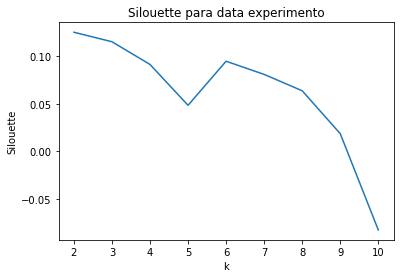

In [38]:
from sklearn.metrics import euclidean_distances, silhouette_score
import matplotlib.pyplot as plt
sil = [] #definimos un objeto vacío tipo lista

for i in range(2,11):
    #kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    pros_km = H2OKMeansEstimator(categorical_encoding=encoding,
                             k=i,
                             seed=1234,
                                 max_iterations=20)
    pros_km.train(x=predictors, #etiqueta de los predictores
              training_frame=train, #data de entrenamiento
              validation_frame=valid) #data de validación
    predict = pros_km.predict(df_medicine)
    df_predict_i=h2o.h2o.as_list(predict, use_pandas=True)
    sil.append(silhouette_score(x, #data
                                df_predict_i.values))#etiqueta de clúster
    #print(sil)
plt.plot(range(2, 11),sil)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette para data experimento")

In [39]:
###
pros_km = H2OKMeansEstimator(categorical_encoding=encoding,
                             k=2,
                             seed=1234, 
                             max_iterations=20)
pros_km.train(x=predictors, #etiqueta de sus predictores
              training_frame=train, #datos de entrenamiento
              validation_frame=valid) #datos de validación
predict = pros_km.predict(df_medicine) #predict etiqueta de grupo o cluster
df_predict=h2o.h2o.as_list(predict, use_pandas=True) #transformamos a un objeto tipo data frame
df_predict_val=df_predict['predict'].to_numpy()
type(df_predict_val)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans prediction progress: |█████████████████████████████████████████████| 100%


numpy.ndarray

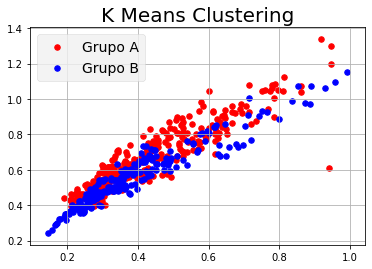

In [40]:
###
plt.scatter(x[df_predict_val == 0, 0], x[df_predict_val == 0, 1], s =30, c = 'red', label = 'Grupo A')
plt.scatter(x[df_predict_val == 1, 0], x[df_predict_val == 1, 1], s = 30, c = 'blue', label = 'Grupo B')
#plt.scatter(x[df_predict_val == 2, 0], x[df_predict_val == 2, 1], s = 100, c = 'cyan', label = 'Grupo C')
#plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Grupo Derrochador')
#plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Grupo Cuidadoso')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroide')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
#plt.xlabel('Ingrsos Anuales')
#plt.ylabel('Puntaje de gastos')
plt.legend()
plt.grid()
plt.show()

In [42]:
h2o.shutdown()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.
